Avem urmatorul labirint:


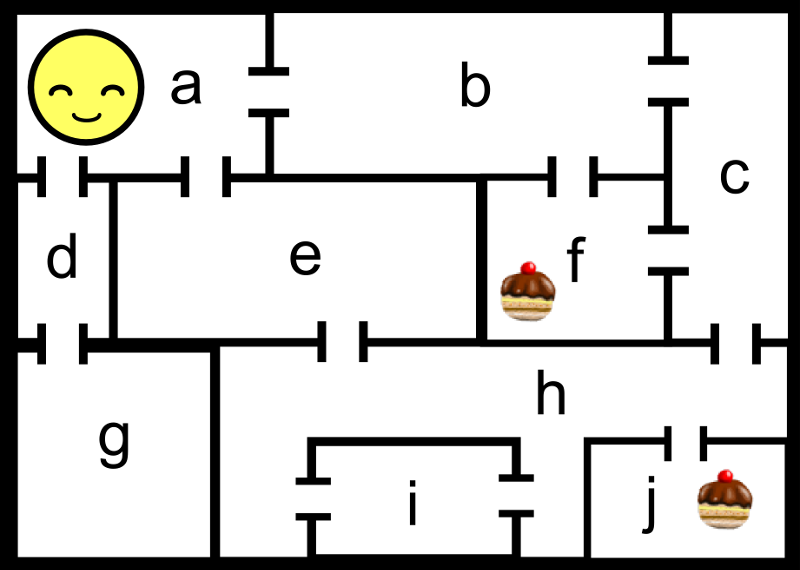

Graful asociat:

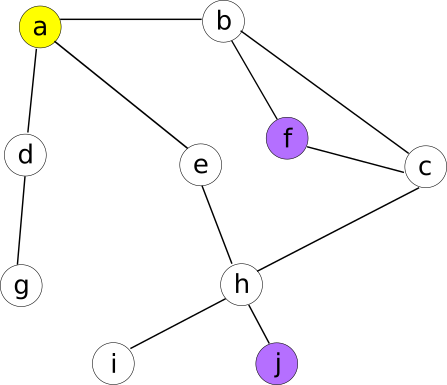

## Breadth-first search

Algoritmul presupune parcurgerea unui graf pornind dintr-un nod special desemnat ca initial si parcurgand graful pana ajungem la un nod scop (solutie). De exemplu: parcurgerea unui labirint (pornim dintr-o camera si incercam sa ajungem la o camera cu iesire din labirint (sau in exemplul dat, la o camera cu prajitura).

In unele situatii ne intereseaza doar sa ajungem la nodul scop fara a afisa drumul, in altele dorim sa dam ca solutie chiar drumul parcurs pana la nodul scop.

**Ideea algoritmului**

Algoritmul creeaza un fel de arbore de parcurgere. Ia nodul intial si spunem ca il expandeaza (adica memoreaza vecinii acestuia). Apoi ia pe rand fiecare dintre nodurile vecine astfel gasite si cauta noduri vecine si pentru ele (avand grija ca respectivele noduri sa nu mai fi fost parcurse inainte, pe acelasi drum. De exemplu un drum de forma a->b->c->a nu ar fi ales). Inainte de expandarea oricarui nod algoritmul verifica daca nodul este un nod scop.

Observatii:

- Arborele de parcurgere este construit nivel de nivel
- Algoritmul ofera cel mai scurt drum
- Algoritmul cauta solutia pe mai multe drumuri in paralel (asta nu inseamna neaparat programare paralela in sensul strict al cuvantului, ci doar faptul ca tine evidenta parcurgerii tuturor drumurilor pana la un nivelul curent in arbore).

Arborele extinderilor se va forma in felul ilustrat mai jos. Consideram cazul in care vrem sa obtinem toate drumurile (sau oricum o parte din ele), motiv pentru care permitem inclusiv extinderea drumurilor cu noduri vizitate pe alta ramura (insa nepermitand repetarea nodului pe un drum de la radacina pana la el).

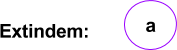

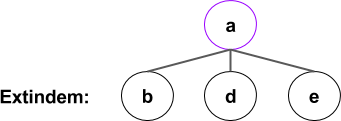

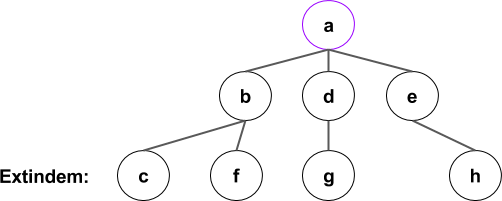


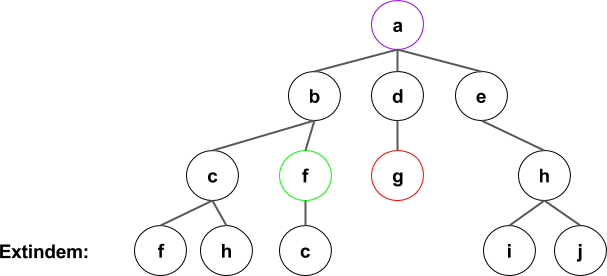

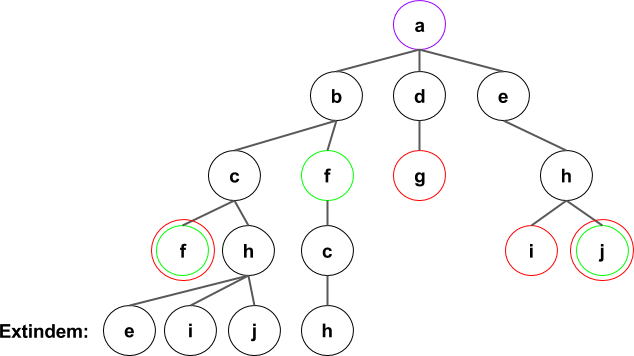

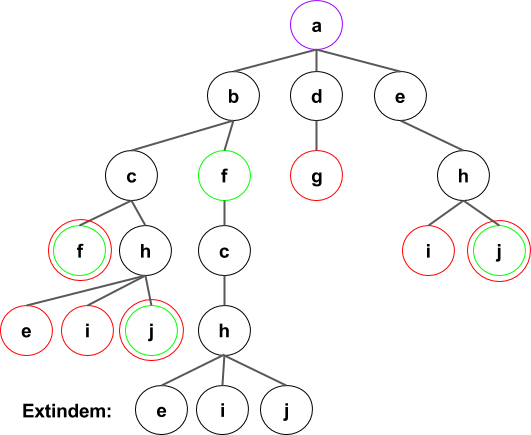

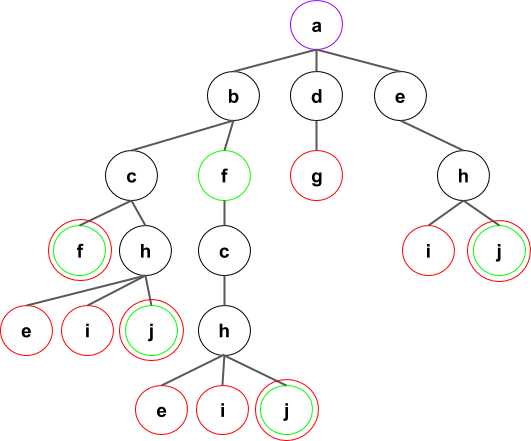

**Pasii algoritmului**

Initializari. Trebuie sa stabilim un nod de start si unul sau mai multe noduri scop. In plus consideram o lista de noduri (sau drumuri, adica liste de noduri) neexpandate inca, organizata sub forma de coada (o vom nota cu c). Pentru fiecare nod vom memora un nod parinte (pentru a putea reconstrui drumul) Punem nodul de start in coada si setam nodul parinte la null (deoarece nodul de start e radacina arborelui de parcurgere).

Repetam urmatorii pasi atata timp cat coada nu e vida, sau nu ne-am oprit din cautat drumuri (am calculat deja suficiente drumuri-solutie):
1. Extragem primul nod din coada. In cazul in care memoram chiar drumuri, extragem drumul.
2. Verificam daca e nod scop. Daca da, ne oprim. (in cazul in care ne intereseaza drumul in sine, afisam drumul)
3. Expandam nodul extras (sau ultimul nod din drumul extras) obtinand nodurile lui vecine
4. Daca nodurile nu au mai fost vizitate, le adaugam in coada c. Pentru a marca nodurile vizitate, avem doua cazuri. Daca ne intereseaza doar prima solutie, putem pur si simplu sa marcam nodul in sine ca fiind vizitat. Daca vrem sa calculam mai multe solutii, verificam pentru fiecare nod din drumul curent (de la radacina pana la nodul tocmai expandat) daca mai apare in drum, caz in care nu il adaugam in coada).

## Depth-first search

Algoritmul presupune parcurgerea unui graf pornind dintr-un nod special desemnat ca initial si parcurgand graful pana ajungem la un nod scop (solutie).

**Ideea algoritmului.**
Algoritmul creeaza un fel de arbore de parcurgere. Ia nodul intial si spunem ca il expandeaza luand un prim succesor al acestuia. Apoi considera drept nod curent acest nod succesor adaugat in drum. La fiecare pas verifica daca nodul curent este nod-scop. Daca nu, ia si pentru el unul dintre succesorii neevalutai inca, si il adauga in drum. Procedeul se continua pana ori gasim o solutie, ori nu mai gasim un succesor viabil pentru nodul curent( de exemplu daca nu are el succesori, sau succesorii lui sunt toti in drum). In acel moment algoritmul se intoarce la nodul anterior nodului curent, si ia urmatorul succesor posibil (daca acesta exista; daca nu exista face intoarceri pana gaseste un nod cu succesori neprocesati).

Observatii:

- Spre deosebire de breadth first, nu mai extinde mai multe drumuri in paralel, nivel de nivel. Drumurile oferite ca solutii nu mai sunt ordonate dupa lungime
- Arborele de parcurgere este construit "ramura de ramura" de la stanga la dreapta.
- Pe un graf infinit, algoritmul se poate bloca pe o ramura, deoarece tinde sa o construiasca pana da de o frunza.

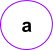

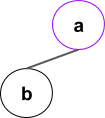

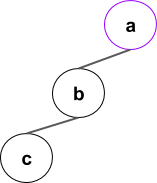

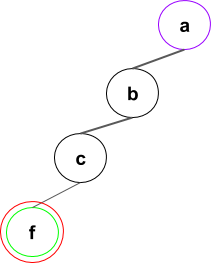

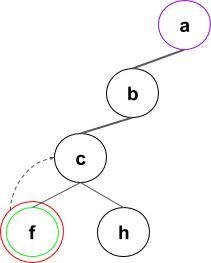

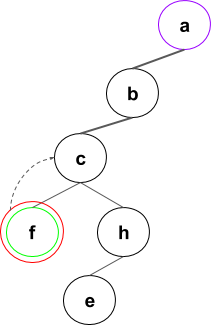

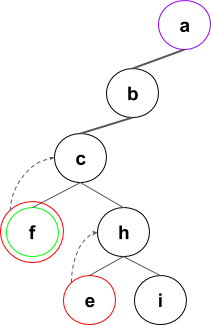

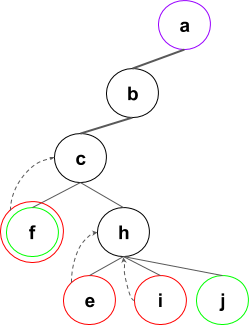

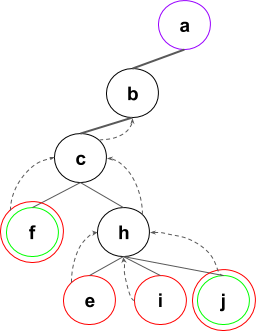

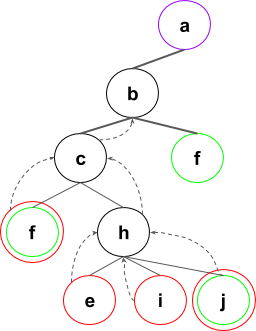

**Pasii algoritmului**

Initializari. Trebuie sa stabilim un nod de start si unul sau mai multe noduri scop. Consideram o stiva S initial vida. Pentru fiecare nod din parcurgerea curenta vom memora un nod parinte (pentru a putea reconstrui drumul). Punem nodul de start in stiva S si setam nodul parinte la null (None), deoarece nodul de start e radacina arborelui de parcurgere.

Repetam urmatorii pasi atata timp cat stiva nu e vida, sau nu ne-am oprit din cautat drumuri (am calculat deja suficiente drumuri-solutie):

1. Pentru primul nod din stiva verificam daca e nod-scop, caz in care afisam drumul. Putem continua apoi algoritmul (in cazul in care avem mai multe noduri scop, putem avea un drum care se termina cu un nod-scop dar are si alte cateva astfel de noduri in componenta sa. De exemplu, drumul a, b, f, c, h, j)
2. Pentru primul nod din stiva cautam un succesor care nu a mai fost evaluat pana acum din multimea de succesori ai nodului din varful stivei, si care nu se afla in stiva curenta (e nevoie si de a doua precizare fiindca nodul succesor daca se afla in stiva curenta, a fost evaluat anterior, dar cu alt parinte). Il punem in stiva, succesorul devenind astfel noul varf.
3. Daca nu avem succesori pentru primul nod din stiva, il stergem din stiva (spunem ca se realizeaza o intoarcere).

### Despre depth-first iterative deepening
**Ideea algoritmului.** 
Se aplica algoritmul depth first pana la o adancime fixa Ad din arbore (se realizeaza o intoarcere in stiva si in momentul in care stiva are lungimea Ad, ca si cum nodul nu ar mai fi avut succesori). Iterativ, aceasta adancime creste de la 1 la o adancime maxima. Ca si in cazul depth-first-ului simplu, cand varful stivei este nod-scop, inseamna ca am gasit o solutie.

Observatii:

- Ca si la breadth first, solutiile sunt ordonate crescator dupa lungimea lor
- Arborele de parcurgere este reconstruit la fiecare nivel. Face mai multi pasi decat depth-first sau breadth-first, dar rezolva urmatoarele probleme: evita umplerea memoriei, cum se intampla la BF (coada poate creste foarte mult pentru grafuri mari), nu ramane blocat pe o ramura foarte lunga sau chiar infinita, cum se intampla la DF

**Pasii algoritmului**

Initializari. Trebuie sa stabilim un nod de start si unul sau mai multe noduri scop. Stabilim si o adancime maxima, ADMAX, pana la care cautam solutii. Consideram o stiva S initial vida. Pentru fiecare nod din parcurgerea curenta vom memora un nod parinte (pentru a putea reconstrui drumul). Punem nodul de start in stiva S si setam nodul parinte la null (None), deoarece nodul de start e radacina arborelui de parcurgere.

Pentru ADcurent (adancimea curenta) de la 1 la ADMAX aplicam algoritmul DF pe graf nemaiexpandand nodul din varful stivei daca stiva are deja lungimea Adcurent

## Implementari

In [1]:
#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    def __init__(self, id, info, parinte):
        self.id=id # este indicele din vectorul de noduri
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere

    def obtineDrum(self):
        l=[self.info]
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte.info)
            nod=nod.parinte
        return l
        
    def afisDrum(self): #returneaza si lungimea drumului
        l=self.obtineDrum()
        print(("->").join(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum = self
        while nodDrum is not None:
            if infoNodNou == nodDrum.info :
                return True
            nodDrum = nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""        
        sir+=self.info+"("
        sir+="id = {}, ".format(self.id)
        sir+="drum="
        drum=self.obtineDrum()
        sir+=("->").join(drum)
        sir+=")"
        return(sir)

In [2]:
class Graph: #graful problemei
    def __init__(self, noduri, matrice, start, scopuri):
        self.noduri=noduri
        self.matrice=matrice
        self.nrNoduri=len(matrice)
        self.start=start
        self.scopuri=scopuri
    def indiceNod(self, n):
        return self.noduri.index(n)
        
    #va genera succesorii sub forma de noduri in arborele de parcurgere    
    def genereazaSuccesori(self, nodCurent):
        listaSuccesori=[]
        for i in range(self.nrNoduri):
            if self.matrice[nodCurent.id][i] == 1 and  not nodCurent.contineInDrum(self.noduri[i]):
                nodNou=NodParcurgere(i, self.noduri[i], nodCurent)
                listaSuccesori.append(nodNou)
        return listaSuccesori

    def testeazaScop(self, nod):
      if nod in noduri and nod in scopuri and nod not in start:
        return 1
      else:
        return 0
        
    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)

#### Initializare problema labirint

In [3]:
#pozitia i din vectorul de noduri da si numarul liniei/coloanei corespunzatoare din matricea de adiacenta		
noduri=["a","b","c","d","e","f","g","h","i","j"]

m=[
	[0,1,0,1,1,0,0,0,0,0],
	[1,0,1,0,0,1,0,0,0,0],
	[0,1,0,0,0,1,0,1,0,0],
	[1,0,0,0,0,0,1,0,0,0],
	[1,0,0,0,0,0,0,1,0,0],
	[0,1,1,0,0,0,0,0,0,0],
	[0,0,0,1,0,0,0,0,0,0],
	[0,0,1,0,1,0,0,0,1,1],
	[0,0,0,0,0,0,0,1,0,0],
	[0,0,0,0,0,0,0,1,0,0]
]

start="a"
scopuri=["f","j"]
gr=Graph(noduri, m, start, scopuri)



#### Implementare Breadth-first search

In [8]:
#### algoritm BF
#presupunem ca vrem mai multe solutii (un numar fix)
#daca vrem doar o solutie, renuntam la variabila nrSolutiiCautate
#si doar oprim algoritmul la afisarea primei solutii
nrSolutiiCautate=4

def breadth_first(gr):
    global nrSolutiiCautate
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.noduri.index(start), start, None)]
    continua=True #variabila pe care o setez la false cand consider ca s-au afisat suficiente solutii
    while(len(c)>0 and continua):
        print("Coada actuala: " + str(c))
        input()
        nodCurent=c.pop(0)

        succesori=gr.genereazaSuccesori(nodCurent)

        for succesor in succesori:
            if gr.testeazaScop(succesor.info) == 1:
                succesor.afisDrum()
                nrSolutiiCautate -= 1
                if nrSolutiiCautate == 0:
                    continua = False

        c.extend(succesori)

In [11]:
%%time

breadth_first(gr)

Coada actuala: [a(id = 0, drum=a)]


TypeError: testeazaScop() takes 1 positional argument but 2 were given

#### Implementare Depth-first search

In [ ]:
#### algoritm DF
#presupunem ca vrem mai multe solutii (un numar fix)
#daca vrem doar o solutie, renuntam la variabila nrSolutiiCautate
#si doar oprim algoritmul la afisarea primei solutii
nrSolutiiCautate=4
continua=True
def depth_first(gr):
    #vom simula o stiva prin relatia de parinte a nodului curent    
    df(NodParcurgere(gr.noduri.index(start), start, None))

                
def df(nodCurent):
    global nrSolutiiCautate, continua
    if not continua:
        return
    print("Stiva actuala: " + "->".join(nodCurent.obtineDrum()))
    input()
    if nodCurent.info in scopuri:
        print("Solutie: ", end="")
        nodCurent.afisDrum()
        nrSolutiiCautate-=1
        if nrSolutiiCautate==0:
            continua=False    
    lSuccesori=gr.genereazaSuccesori(nodCurent)    
    for sc in lSuccesori:
        df(sc)

In [ ]:
%%time
continua = True

depth_first(gr)

#### Implementare Depth-first iterativ

In [ ]:
#### algoritm DFI
#presupunem ca vrem mai multe solutii (un numar fix)
#daca vrem doar o solutie, renuntam la variabila nrSolutiiCautate
#si doar oprim algoritmul la afisarea primei solutii
nrSolutiiCautate=4
continua=True

def depth_first_iterative_deepening(gr,adancimeMax):
    #vom simula o stiva prin relatia de parinte a nodului curent    
    for i in range(1, adancimeMax):
        print("Adancime maxima: ", i)
        dfi(i, NodParcurgere(gr.noduri.index(start), start, None))


# ca functia df doar ca impunem si o lungime maxima a drumului

def dfi(adMaxCurenta, nodCurent):
    global nrSolutiiCautate, continua
    #descrestem adMaxCurenta pana la 0
    if adMaxCurenta<=0 or not continua: #ar trebui adMaxCurenta sa nu ajunga niciodata < 0
        return
    adMaxCurenta -= 1
    print("Stiva actuala: " + "->".join(nodCurent.obtineDrum()))
    
    if nodCurent.info in scopuri:
        print("Solutie: ", end="")
        nodCurent.afisDrum()
        input()
        nrSolutiiCautate-=1
        if nrSolutiiCautate==0:
            continua=False    
    lSuccesori=gr.genereazaSuccesori(nodCurent)    
    for sc in lSuccesori:
        dfi(adMaxCurenta, sc)



In [ ]:

#### algoritm DFI
#presupunem ca vrem mai multe solutii (un numar fix)
#daca vrem doar o solutie, renuntam la variabila nrSolutiiCautate
#si doar oprim algoritmul la afisarea primei solutii
nrSolutiiCautate=4
continua=True

def depth_first_iterative_deepening(gr,adancimeMax):
  #vom simula o stiva prin relatia de parinte a nodului curent	
  for i in range(1, adancimeMax):
    print("Adancime maxima: ", i)
    dfi(i, NodParcurgere(gr.noduri.index(start), start, None))

# ca functia df doar ca impunem si o lungime maxima a drumului

def dfi(adMaxCurenta, nodCurent):
  global nrSolutiiCautate, continua
  #descrestem adMaxCurenta pana la 0
  if adMaxCurenta<=0 or not continua: #ar trebui adMaxCurenta sa nu ajunga niciodata < 0
    return
  adMaxCurenta -= 1
  print("Stiva actuala: " + "->".join(nodCurent.obtineDrum()))

  if nodCurent.info in scopuri:
    print("Solutie: ", end="")
    nodCurent.afisDrum()
    input()
    nrSolutiiCautate-=1
    if nrSolutiiCautate==0:
      continua=False	
  lSuccesori=gr.genereazaSuccesori(nodCurent)	
  for sc in lSuccesori:
    dfi(adMaxCurenta, sc)


In [ ]:
adancimeMaxima=5
continua = True

depth_first_iterative_deepening(gr,adancimeMaxima)

#### Bonus: profiling

%%time, line_profiler, ...

In [ ]:
!pip install line_profiler
%load_ext line_profiler


     |████████████████████████████████| 67 kB 3.1 MB/s 


In [ ]:
%lprun -f breadth_first breadth_first(gr)


# Exercitii

1. Implementati in clasa `Graph` o metoda de instanta `testeazaScop(nod)`, care sa inlocuiasca modul in care se verifica nodurile scop in codul de mai sus. Modificati unul dintre algoritmi astfel incat sa foloseasca noua metoda (BFS/DFS/DFI)

In [ ]:
def testeazaScop(nod):
  if nod in noduri and nod in scopuri and nod not in start:
    return 1
  else:
    return 0

2. Îmbunătățire BF astfel incat sa afișeze un drum-solutie chiar in momentul in care se adauga nodul scop in coada (sa nu mai astepte sa ajungă să fie primul in coada). 



3. La afisarea solutiei pt DFI, afisati pentru fiecare nod din graf de cate ori a fost extins in total (practic din cate iteratii a facut parte). Puteti folosi un dictionar sau Counter.


4. Sa se afiseze la DF la fiecare expandare nodul expandat si stiva actuala si textul "se intoarce ->" pentru fiecare eliminare de nod din stiva. 
De exemplu, fragment din afisare:


    Stiva: a->b->c
    Se expandeaza c
    Stiva: a->b->c->f
    Solutie: a->b->c->f

    Se intoarce ->
    Se expandeaza c

    Stiva: a->b->c->h





5. Implementati BF folosind un obiect de tip Queue din Python si afisati toate solutiile. Scoateti apelurile de tip input din programul dat la laborator. 
(Ce structura e mai eficienta? Observatie: daca diferentele de timp sunt prea mici, mariti numarul de noduri si de muchii in matricea de adiacenta.)



6. Generati un graf aleator cu un numar mai mare de noduri (dar nu foarte mare), de exemplu N=20 noduri si un numar mare (dar nu foarte mare) de muchii/arce, de exemplu M=200. Nodul 0 va fi nodul start. Alegeti aleator S noduri scop (de exemplu S=5).
Implementati algorimul DF in mod nerecursiv folosind o stiva. Folositi in implementare:

a) o lista pe post de stiva

b) deque din modulul collections

c) LifoQueue din modulul queue

-eventual inca un mod propriu de rezolvare

